In [6]:
# Import Necessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
# Step 1: Data Collection
# Function to download historical stock data and plot closing prices
def download_and_plot_stock_data(ticker, start_date, end_date):
    # Download stock data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
# Step 1: Data Collection
# Function to download historical stock data and plot closing prices
def download_and_plot_stock_data(ticker, start_date, end_date):
    # Download stock data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    # Check for null values
    null_values = stock_data.isnull().sum()
    print("Null values in each column:\n", null_values)

    # Extract and plot the closing prices
    stock_prices = stock_data['Close']
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, label=f'{ticker} Stock Prices (Close)')
    plt.title(f'{ticker} Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.grid()
    plt.show()

    return stock_prices
    # Extract and plot the closing prices
    stock_prices = stock_data['Close']
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, label=f'{ticker} Stock Prices (Close)')
    plt.title(f'{ticker} Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.grid()
    plt.show()

    return stock_prices

In [8]:
# Step 2: Check for Stationarity
# Function to check for stationarity using ADF test and apply differencing if necessary
def check_stationarity(stock_prices):
    result = adfuller(stock_prices)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

    if result[1] > 0.05:
        print("The series is not stationary, applying differencing...")
        stock_prices_diff = stock_prices.diff().dropna()
    else:
        print("The series is stationary.")
        stock_prices_diff = stock_prices

    return stock_prices_diff

In [9]:

# Step 3: ACF and PACF Plots
# Function to plot ACF and PACF to help determine ARIMA parameters
def plot_acf_pacf(stock_prices_diff):
    plt.figure(figsize=(12, 6))
    plot_acf(stock_prices_diff, lags=40)
    plt.title("ACF (Autocorrelation Function)")
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(stock_prices_diff, lags=40)
    plt.title("PACF (Partial Autocorrelation Function)")
    plt.show()

In [10]:
# Step 4: Fit the ARIMA Model
# Function to fit ARIMA model and print summary
def fit_arima_model(stock_prices, order):
    model = ARIMA(stock_prices, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    return model_fit

In [11]:
# Step 5: Forecast Future Prices
# Function to forecast future stock prices using the ARIMA model
def forecast_prices(model_fit, stock_prices, steps=30):
    forecast = model_fit.forecast(steps=steps)

     # Plot the historical prices and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, label='Historical Stock Prices')
    plt.plot(pd.date_range(start=stock_prices.index[-1], periods=steps+1, freq='B')[1:], forecast, label='Forecast', color='red')

    # Create a DataFrame to store actual and forecasted values
    forecast_dates = pd.date_range(start=stock_prices.index[-1], periods=steps+1, freq='B')[1:]
    actual_vs_predicted = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Close_Price': forecast.values})
    actual_vs_predicted.set_index('Date', inplace=True)
    print("Actual vs Forecasted Close Prices:")
    print(actual_vs_predicted.head())
    plt.title(f"Stock Price Forecast (Next {steps} Days)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

    return forecast

[*********************100%***********************]  1 of 1 completed


Null values in each column:
 Price      Ticker
Adj Close  JPM       0
Close      JPM       0
High       JPM       0
Low        JPM       0
Open       JPM       0
Volume     JPM       0
dtype: int64


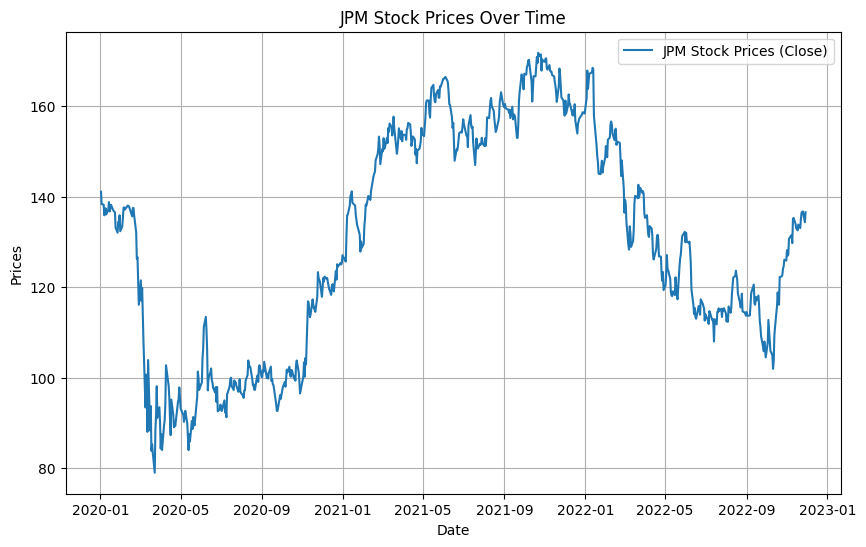

ADF Statistic: -1.3398940150367051
p-value: 0.6107289857986112
The series is not stationary, applying differencing...


<Figure size 1200x600 with 0 Axes>

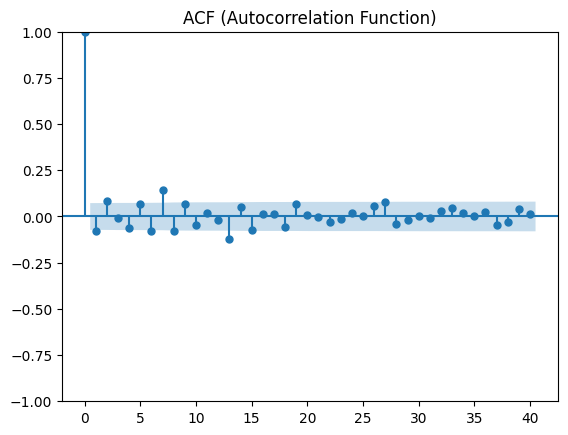

<Figure size 1200x600 with 0 Axes>

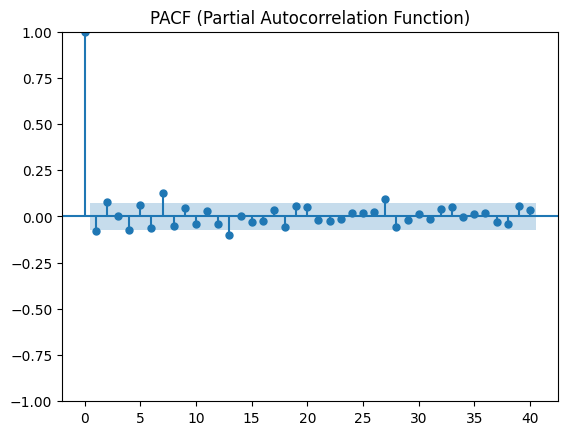

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    JPM   No. Observations:                  734
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1765.204
Date:                Thu, 14 Nov 2024   AIC                           3538.408
Time:                        03:54:46   BIC                           3556.796
Sample:                             0   HQIC                          3545.501
                                - 734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0620      0.332     -0.187      0.852      -0.713       0.589
ar.L2          0.0798      0.043      1.862      0.063      -0.004       0.164
ma.L1         -0.0128      0.330     -0.039      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


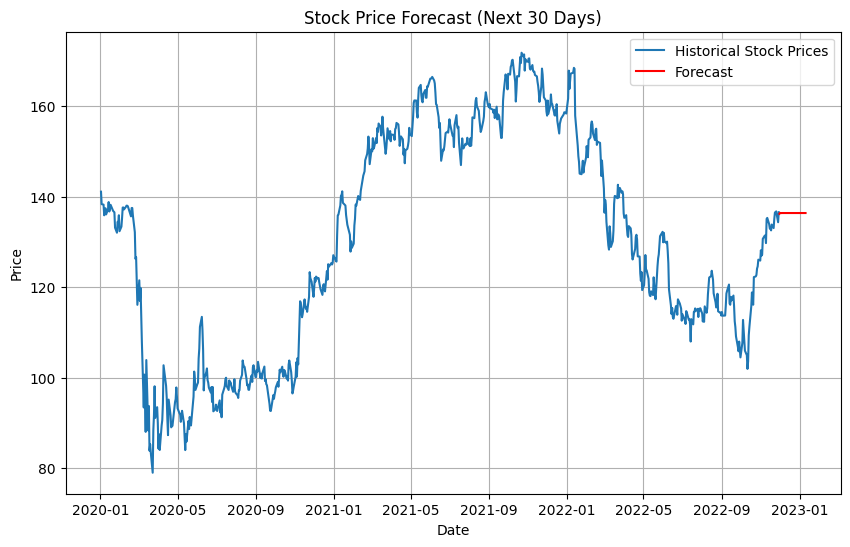

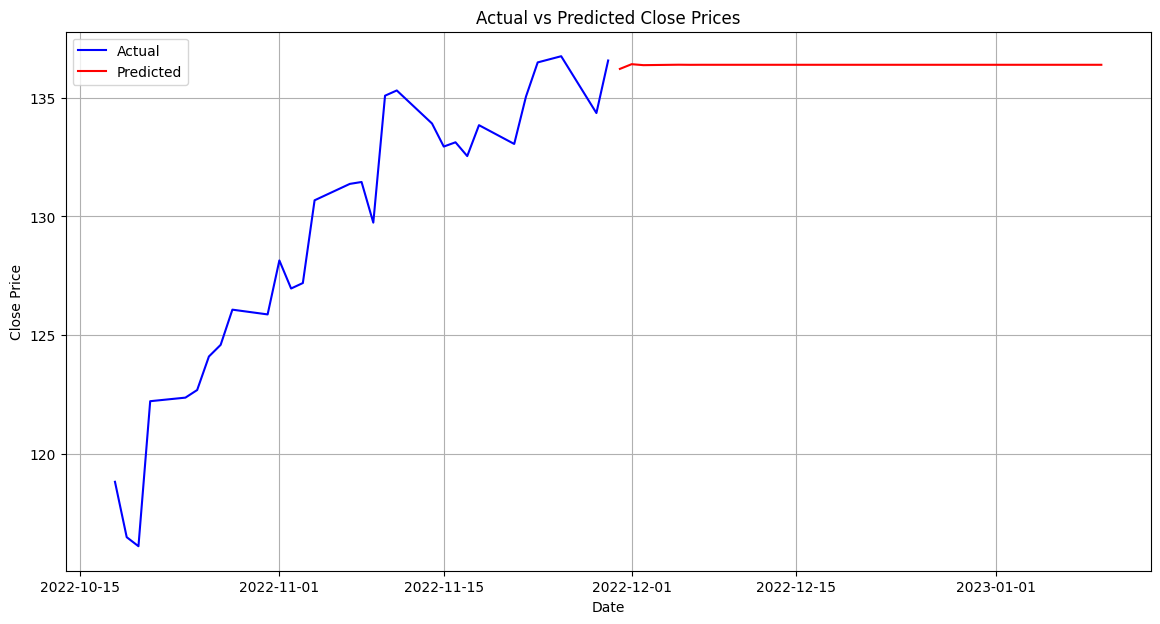

[*********************100%***********************]  1 of 1 completed

RMSE: 4.03


In [14]:

# Step 6: Model Evaluation
# Function to evaluate the model using RMSE
def evaluate_model(ticker, forecast, start_date, end_date):
    # Download actual data for evaluation period
    test_data = yf.download(ticker, start=start_date, end=end_date)
    test_set = test_data['Close']

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_set, forecast[:len(test_set)]))
    print(f"RMSE: {rmse:.2f}")

# Example usage
# Define the stock ticker, start date, and end date for data collection
ticker = 'JPM'  # Replace with preferred ticker symbol
start_date = '2020-01-01'  # Start date for historical data
end_date = '2022-11-30'  # End date for historical data

# Step 1: Download and plot stock data
stock_prices = download_and_plot_stock_data(ticker, start_date, end_date)

# Step 2: Check for stationarity and apply differencing if necessary
stock_prices_diff = check_stationarity(stock_prices)

# Step 3: Plot ACF and PACF
plot_acf_pacf(stock_prices_diff)

# Step 4: Fit the ARIMA model (based on ACF and PACF analysis, order=(2, 1, 1))
model_fit = fit_arima_model(stock_prices, order=(2, 1, 1))

# Step 5: Forecast future prices (next 30 days)
forecast = forecast_prices(model_fit, stock_prices, steps=30)

# Step 6: Model Evaluation
# Define evaluation period
eval_start_date = '2022-12-01'
eval_end_date = '2023-01-15'
# Evaluate the forecast

# Plot actual vs forecasted close prices as part of the example usage
plt.figure(figsize=(14, 7))
plt.plot(stock_prices.index[-30:], stock_prices[-30:], label='Actual', color='blue')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=31, freq='B')[1:], forecast, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()
evaluate_model(ticker, forecast, eval_start_date, eval_end_date)
